# 07 Visualizing larger packs 

In this example we will demonstrate another method for visualizing the data from a simulation that may be more convenient for larger packs.

In [1]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import numpy as np
import os
import pybamm

nproc = os.cpu_count()

Set up and run a simulation with 5000 cells. Plotting the information for all the cells using `lp.plot_cells` would take a long time to render and also would not contain any spatial information about regions of the pack experiencing different conditions.

In [2]:
Np = 100
Ns = 50
Nspm = Np * Ns
# Generate the netlist
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Rb=1e-5, Ri=3e-2)
# Define additional output variables
output_variables = [
    "Volume-averaged cell temperature [K]",
]
# Define a cycling experiment using PyBaMM
experiment = pybamm.Experiment(
    [
        "Discharge at 100 A for 10 minutes",
    ],
    period="1 minute",
)
# Define the PyBaMM parameters
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
parameter_values.update(
    {"Total heat transfer coefficient [W.m-2.K-1]": "[input]"}
)
htc = np.random.random(Nspm) * 50.0
inputs = {"Total heat transfer coefficient [W.m-2.K-1]": htc}
# Solve the pack
output = lp.solve(
    netlist=netlist,
    sim_func=lp.thermal_simulation,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    inputs=inputs,
    initial_soc=0.5,
    nproc=nproc
)

Stepping simulation: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.41s/it]


We can use `plot_cell_data_image` to produce a snapshot of the system in image format which has the same dimensions as the number of cells in parallel and series.

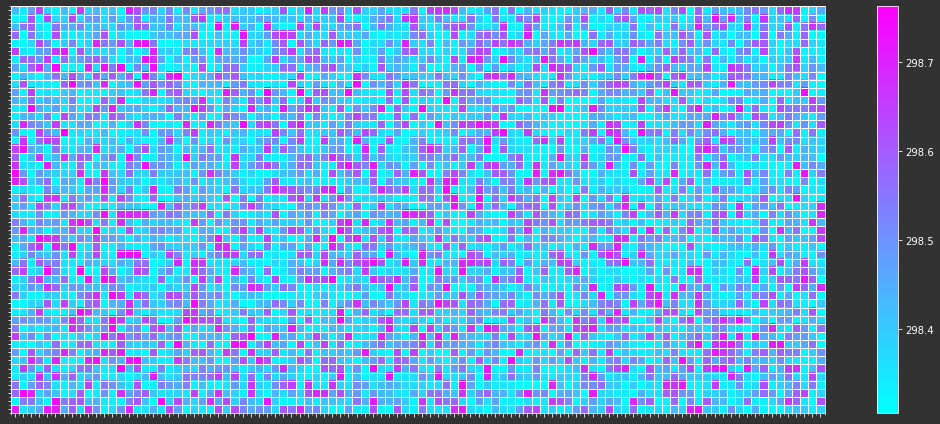

In [7]:
data = output["Volume-averaged cell temperature [K]"][-1, :]
lp.plot_cell_data_image(netlist, data, tick_labels=False, figsize=(15, 6))

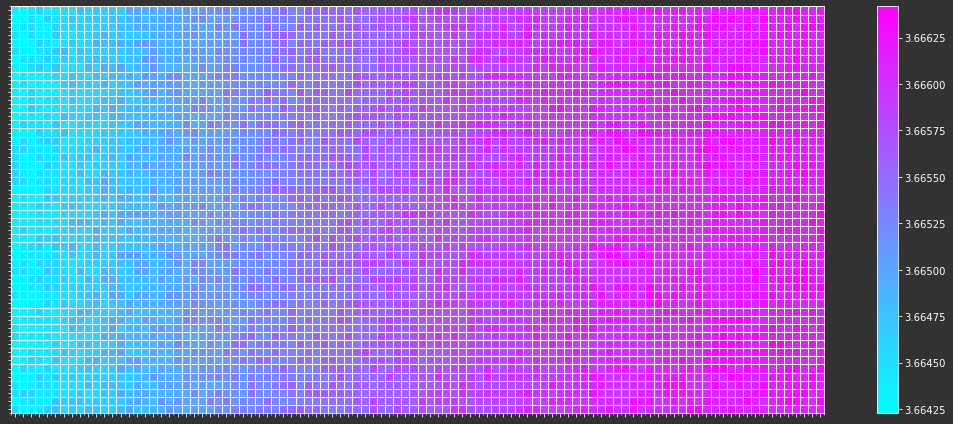

In [8]:
data = output["Terminal voltage [V]"][-1, :]
lp.plot_cell_data_image(netlist, data, tick_labels=False, figsize=(15, 6))